In [1]:
# this notebook serves as an exploration of the solid tissue normal samples from the TCGA across all cancer types 
# the ultimate goal is to identify samples that are close enough to the samples used in the LUAD data so that I can bolster the
# normal samples in the graph classification project without having to rely heavily on tools like SMOTE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# load data and metadata
data = pd.read_csv('STN_star_counts/DESeq2_Norm.csv', index_col=0)
metadata = pd.read_csv('STN_star_counts/trim_metadata.csv',index_col=0)

In [4]:
data.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-BH-A203-11A,3292.574161,548.527344,1270.496496,1052.636664,258.047568,338.423040,2952.741025,1087.184016,2445.811513,1719.612072,...,0.0,0.705048,24.676680,0.0,0.0,0.0,478.022544,0.0,12.690864,9.165624
TCGA-AC-A2FM-11B,3412.350217,349.962910,1607.456757,478.762819,121.173598,563.499601,3064.929410,1671.856712,1145.641295,1074.462398,...,0.0,0.000000,14.405253,0.0,0.0,0.0,205.063013,0.0,5.931575,26.268402
TCGA-HV-A5A3-11A,3703.793100,1.197863,1308.066645,730.696569,177.283758,1499.724761,3398.337977,2132.196545,1282.911517,1296.088012,...,0.0,0.000000,37.133760,0.0,0.0,0.0,165.305125,0.0,5.989316,29.946581
TCGA-H6-8124-11A,2991.354547,3.201021,1225.991216,767.444893,194.462053,1637.322473,5943.496582,2269.524210,2082.264455,1300.414965,...,0.0,0.000000,11.203575,0.0,0.0,0.0,154.449285,0.0,7.202298,24.807916
TCGA-YB-A89D-11A,1805.765821,375.209345,1392.015335,394.479916,149.630313,5685.951888,6149.579145,2632.133230,1328.535808,1246.919274,...,0.0,0.000000,21.537697,0.0,0.0,0.0,121.291238,0.0,6.801378,18.137008


In [5]:
metadata = pd.read_csv('STN_star_counts/trim_metadata.csv',index_col=0)
metadata.index = metadata['sample_barcode']
metadata.head()

,file_id,file_name,project_id,case_id,case_barcode,sample_barcode,age_at_diagnosis,tumor_stage,tumor_grade,progression_or_recurrence,days_to_recurrence,days_to_death,vital_status,gender,race,ethnicity
sample_barcode,,,,,,,,,,,,,,,,
TCGA-BH-A203-11A,699e47b8-5396-43eb-927d-8d05b0e79644,1dd6852b-2456-4576-9b22-f7604277c955.rna_seq.a...,TCGA-BRCA,b3264748-947a-43aa-b227-b294fbcc8447,TCGA-BH-A203,TCGA-BH-A203-11A,28609.0,NaN,NaN,NaN,NaN,NaN,NaN,female,white,not hispanic or latino
TCGA-AC-A2FM-11B,52151eca-7819-496e-bf31-4875b68d429d,34478743-530d-4d71-a124-90ad54ded5c1.rna_seq.a...,TCGA-BRCA,b6b1dc9a-91f4-4b0a-afd5-62c9a90c0d5e,TCGA-AC-A2FM,TCGA-AC-A2FM-11B,31805.0,NaN,NaN,NaN,NaN,NaN,NaN,female,white,not hispanic or latino
TCGA-HV-A5A3-11A,4fb9dcda-853a-41e5-b840-8595f0c6927e,e720a8b3-86ab-411f-87c4-4247529ce823.rna_seq.a...,TCGA-PAAD,d4f66f06-9289-45c1-b9eb-aaef991a4bb6,TCGA-HV-A5A3,TCGA-HV-A5A3-11A,18475.0,NaN,G2,NaN,NaN,NaN,NaN,male,asian,not reported
TCGA-H6-8124-11A,f6e10a0d-b15f-46a9-909a-0a9fa7a130bd,a527dbe2-ff8a-4351-9bf8-3477d3c008de.rna_seq.a...,TCGA-PAAD,7e4e5633-6f83-4b46-b6eb-64b3f2866ba3,TCGA-H6-8124,TCGA-H6-8124-11A,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,female,white,not hispanic or latino
TCGA-YB-A89D-11A,6604da06-00ac-4894-92c6-4a7c0b48acd3,e1f5eba9-3575-499e-bd32-1f9d7e8c9d6a.rna_seq.a...,TCGA-PAAD,b84b58c7-95b8-4162-8e61-414f8fe422c6,TCGA-YB-A89D,TCGA-YB-A89D-11A,21792.0,NaN,G2,NaN,NaN,NaN,NaN,male,white,not hispanic or latino


In [67]:
# create data point labels, note sample order from the norm data and the trim metadata should be identical , but just to be sure
# I am aligning samples based on sample barcode
labels = [metadata.loc[i,'project_id'] for i in data.index]

# then, because the full TCGA database includes some non-cancer relevant samples (i.e. EXCPTIONAL_RESPONDERS) filter metadata and labels 
# to only include samples that start with 'TCGA-'
tcga_samps = [i.startswith('TCGA-') for i in labels]
data = data.loc[tcga_samps,:]
labels = [i for i in labels if i.startswith('TCGA-')]

In [7]:
# scale data then perform pca. Note: this PCA is strictly to udnerstand the structure of the data and not to build a classifier, so I
# will not be train/test splitting the data like you would need to for a classification problem
scaler = StandardScaler()
gexp_scaled = scaler.fit_transform(data.values)

In [8]:
pca = PCA(n_components=10)
pca.fit(gexp_scaled)
transformed_data = pca.transform(gexp_scaled)

In [9]:
# check variance ratios, looks like first 5 - 7 pcs are relatively informative (last half have lower expalined variance)
pca.explained_variance_ratio_

array([0.06316496, 0.04662123, 0.03640145, 0.03256204, 0.02926895,
       0.02658423, 0.02300901, 0.02017987, 0.01817819, 0.01555307])

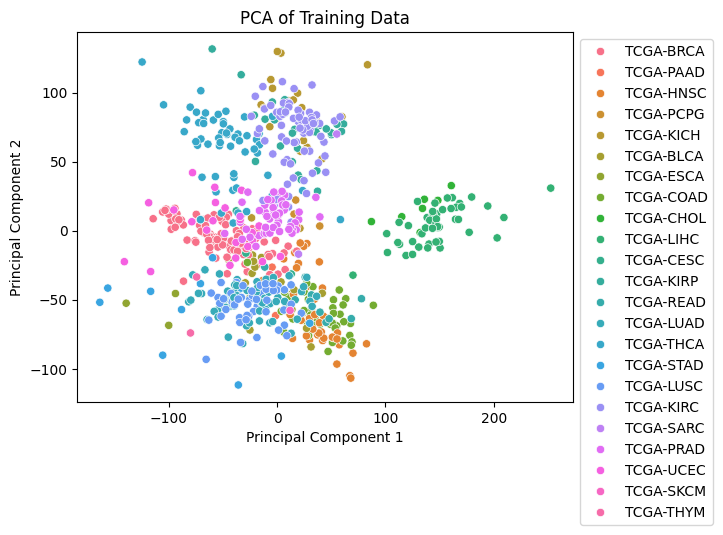

In [10]:
ax = sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1], hue=labels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data')
plt.show()

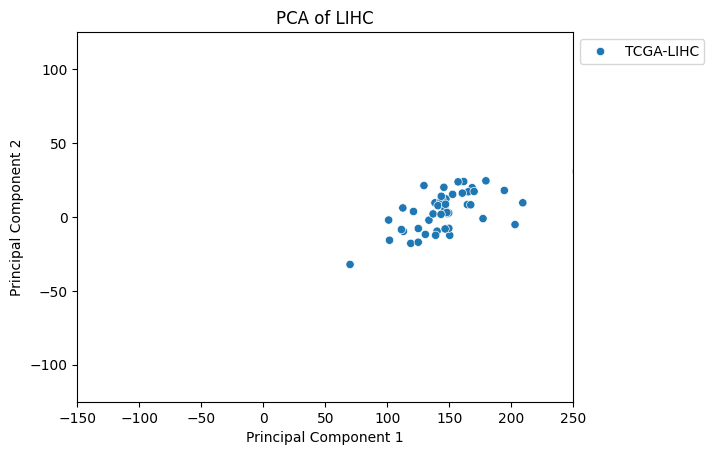

In [11]:
# can investigate different cancers individually, for instance the liver and intrahepatic bile ducts LIHC cluster which is
# relatively separated from the other groups
projType = ['TCGA-LIHC']
projSamps = [i in projType for i in labels]
projLabels = [i for i in labels if i in projType]
ax = sns.scatterplot(x=transformed_data[projSamps, 0], y=transformed_data[projSamps, 1], hue=projLabels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(-150, 250)
plt.ylim(-125, 125)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of LIHC')
plt.show()

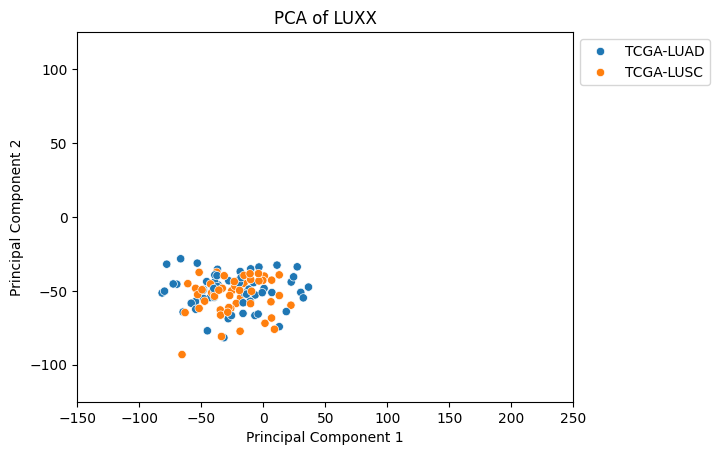

In [12]:
# and combine datasets from related organs like Lung Adenocarcinoma (LUAD), Lung Squamous Cell Carcinoma (LUSC)
projType = ['TCGA-LUAD', 'TCGA-LUSC']
projSamps = [i in projType for i in labels]
projLabels = [i for i in labels if i in projType]
ax = sns.scatterplot(x=transformed_data[projSamps, 0], y=transformed_data[projSamps, 1], hue=projLabels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(-150, 250)
plt.ylim(-125, 125)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of LUXX')
plt.show()

In [13]:
# reassuringly for the purposes of this investigation: the solid tissue normal samples for these projects have largely overlapping clusters
# and other noraml tissue samples also cluster in this area!

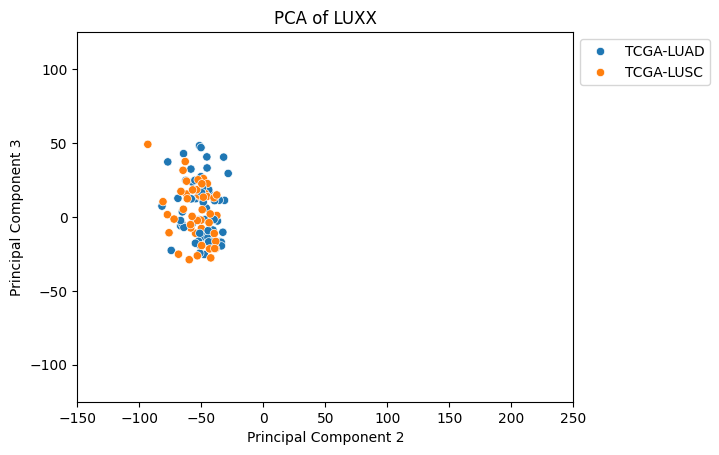

In [14]:
projType = ['TCGA-LUAD', 'TCGA-LUSC']
projSamps = [i in projType for i in labels]
projLabels = [i for i in labels if i in projType]
ax = sns.scatterplot(x=transformed_data[projSamps, 1], y=transformed_data[projSamps, 2], hue=projLabels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(-150, 250)
plt.ylim(-125, 125)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA of LUXX')
plt.show()

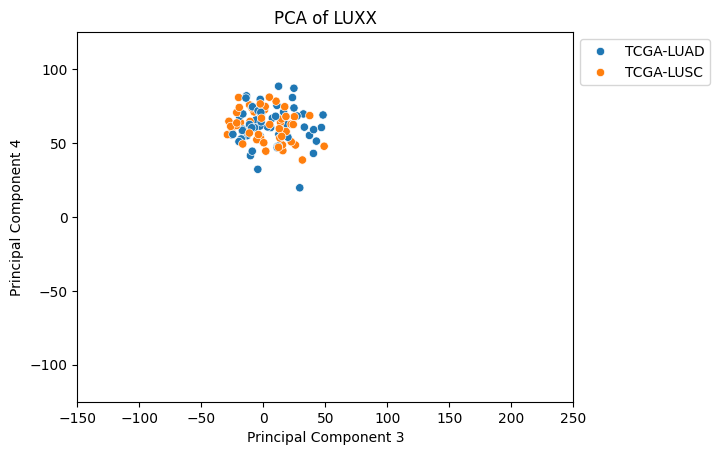

In [15]:
projType = ['TCGA-LUAD', 'TCGA-LUSC']
projSamps = [i in projType for i in labels]
projLabels = [i for i in labels if i in projType]
ax = sns.scatterplot(x=transformed_data[projSamps, 2], y=transformed_data[projSamps, 3], hue=projLabels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(-150, 250)
plt.ylim(-125, 125)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA of LUXX')
plt.show()

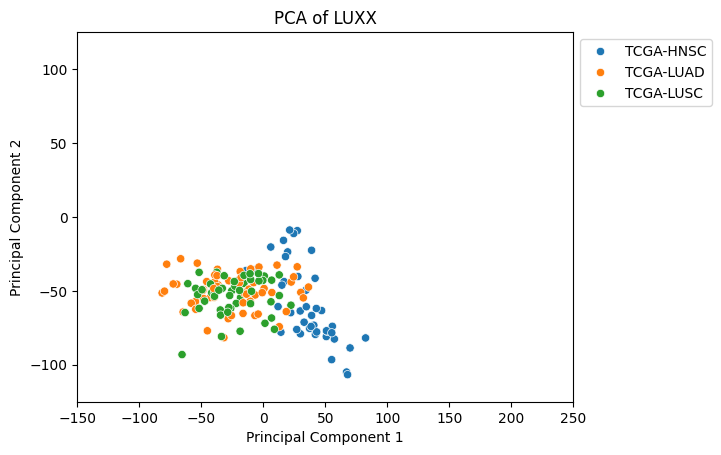

In [16]:
# and combine datasets from related organs like Lung Adenocarcinoma (LUAD), Lung Squamous Cell Carcinoma (LUSC)
projType = ['TCGA-LUAD', 'TCGA-LUSC', 'TCGA-HNSC',]
projSamps = [i in projType for i in labels]
projLabels = [i for i in labels if i in projType]
ax = sns.scatterplot(x=transformed_data[projSamps, 0], y=transformed_data[projSamps, 1], hue=projLabels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlim(-150, 250)
plt.ylim(-125, 125)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of LUXX')
plt.show()

In [18]:
# Clustering stays close across PCs reinforcing that these samples could be copmatible, now just need to validate by comparing to an out
# group, the LUAD Cancer samples

In [19]:
LUADdata = pd.read_csv('LUAD_star_counts/DESeq2_Norm.csv', index_col=0)
LUADmetadata = pd.read_csv('LUAD_star_counts/trim_metadata.csv',index_col=0)

In [80]:
# just just the LUAD tumor samples since the solid tissue normal are already present in the data
LUADdata = LUADdata.loc[LUADmetadata[LUADmetadata['sample_type'] == 'Primary Tumor']['sample_barcode'].values,:]
# concatentate the dataframes
projType = ['TCGA-LUAD', 'TCGA-LUSC', 'TCGA-HNSC']
projSamps = [i in projType for i in labels]
concatData = pd.concat([data.loc[projSamps,:],LUADdata.iloc[0:152,:]])
# trim nan containing columns 
concatData = concatData.dropna(axis=1)

In [81]:
STNvCan_scaler = StandardScaler()
STNvCan_gexp_scaled = STNvCan_scaler.fit_transform(concatData.values)

In [82]:
STNvCan_pca = PCA(n_components=10)
STNvCan_pca.fit(STNvCan_gexp_scaled)
STNvCan_transformed_data = STNvCan_pca.fit(STNvCan_gexp_scaled).transform(STNvCan_gexp_scaled)

In [83]:
STN_projType = ['TCGA-LUAD', 'TCGA-LUSC', 'TCGA-HNSC']
STN_projSamps = [i for i in labels if i in projType]
STNvCan_labels = STN_projSamps + ['Primary Tumor']*152

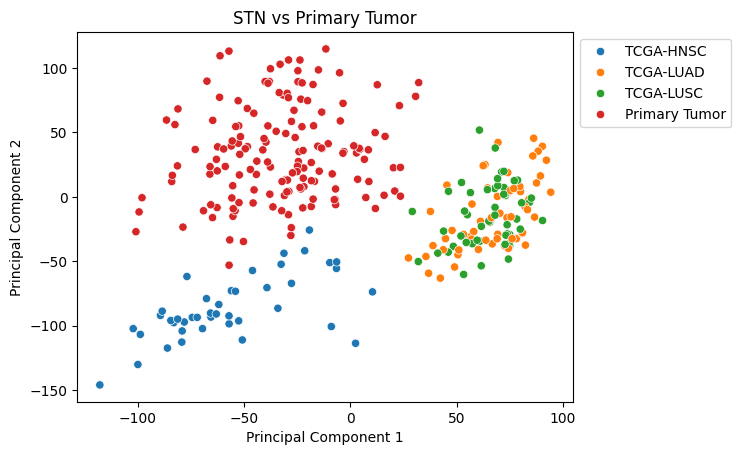

In [84]:
ax = sns.scatterplot(x=STNvCan_transformed_data[:, 0], y=STNvCan_transformed_data[:, 1], hue=STNvCan_labels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.xlim(-150, 250)
# plt.ylim(-125, 125)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('STN vs Primary Tumor')
plt.show()

In [85]:
# interestingly the addition of the primary tumor samples shifts the PCA axis in such a way that the HNSC samples are shifted away from the 
# LUAD and LUSC STN samples. So for the purposes of increasing sample sizes I will stick to using just LUAD and LUSC samples

In [76]:
# for fun, I want to see how the full STN samples cluster against the single cancer sample

152

In [98]:
All_concatData = pd.concat([data,LUADdata])
All_concatData = All_concatData.dropna(axis=1)

All_labels = [metadata.loc[i,'project_id'] for i in data.index]
All_labels = All_labels + ['Primary Tumor']*(len(All_concatData) - len(All_labels))

In [99]:
All_scaler = StandardScaler()
All_gexp_scaled = All_scaler.fit_transform(All_concatData.values)

In [100]:
All_pca = PCA(n_components=10)
All_pca.fit(STNvCan_gexp_scaled)
All_transformed_data = All_pca.fit(All_gexp_scaled).transform(All_gexp_scaled)

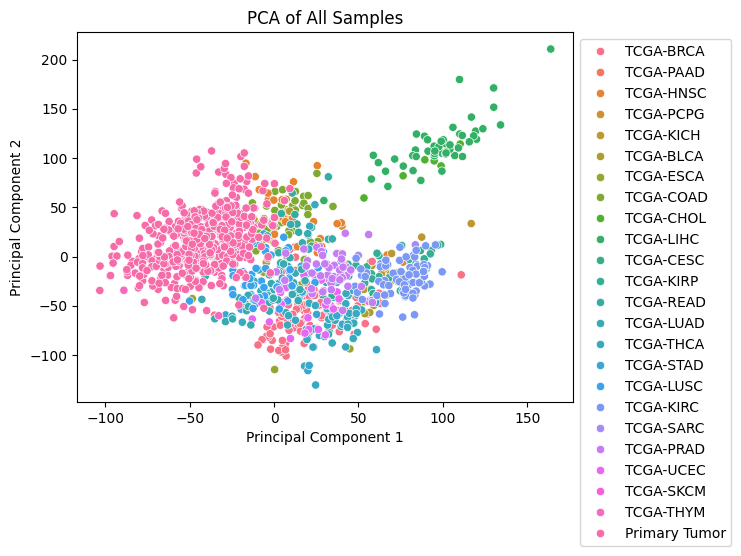

In [102]:
# and combine datasets from related organs like Lung Adenocarcinoma (LUAD), Lung Squamous Cell Carcinoma (LUSC)
ax = sns.scatterplot(x=All_transformed_data[:, 0], y=All_transformed_data[:, 1], hue=All_labels)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of All Samples')
plt.show()